In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vehicle_data.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
df.rename(columns={'Kilometer_per_liter':'mil'},inplace=True)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,mil
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
df.shape

(398, 9)

### Null Value Handling

In [5]:
df1 = df.copy()

In [6]:
df1.isnull().sum()

origin          0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
name            0
mil             0
dtype: int64

### Checking Data Types

In [7]:
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
name             object
mil             float64
dtype: object

In [8]:
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,mil
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [12]:
df1['horsepower'].value_counts().sort_values(ascending=False)
# descendig order

150    22
90     20
88     19
110    18
100    17
       ..
113     1
137     1
138     1
66      1
93      1
Name: horsepower, Length: 94, dtype: int64

In [10]:
df1['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
df1['horsepower'] = df1['horsepower'].replace('?','150')
df1['horsepower'].value_counts().sort_values(ascending=False)

150    28
90     20
88     19
110    18
100    17
       ..
113     1
137     1
138     1
208     1
93      1
Name: horsepower, Length: 93, dtype: int64

In [14]:
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
name             object
mil             float64
dtype: object

In [15]:
# Method - 1
# df1['horsepower'] = pd.to_numeric(df1['horsepower'])
# df1.dtypes

# Method - 2
df1['horsepower'] = df1['horsepower'].astype('int')
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
year              int64
name             object
mil             float64
dtype: object

In [17]:
df1['name'].nunique()

305

In [18]:
df1.drop('name',axis=1,inplace=True)
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,mil
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443


In [19]:
df1.shape

(398, 8)

#### Univariate Data Analysis

In [20]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'mil'],
      dtype='object')

In [22]:
# categorical column
d1 = df1['origin'].value_counts()
d1

1    249
3     79
2     70
Name: origin, dtype: int64

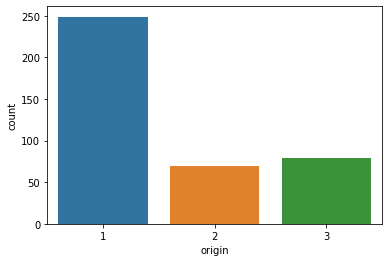

In [24]:
sns.countplot(x=df1['origin'])
plt.show()

In [26]:
# categorical like column
d2 = df1['cylinders'].value_counts()
d2

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

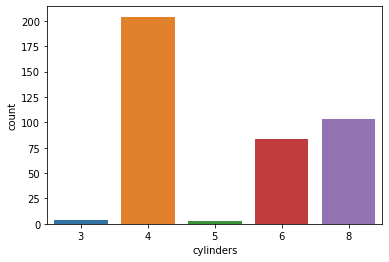

In [28]:
sns.countplot(x=df1['cylinders'])
plt.show()

In [29]:
d3 = df1['displacement'].value_counts()
d3

97.0     21
350.0    18
98.0     18
318.0    17
250.0    17
         ..
83.0      1
181.0     1
81.0      1
96.0      1
144.0     1
Name: displacement, Length: 82, dtype: int64

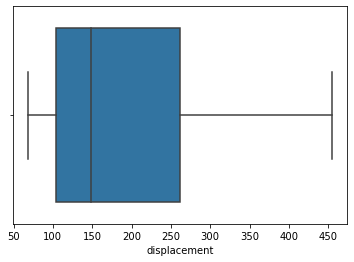

In [31]:
sns.boxplot(x=df1['displacement'])
plt.show()

In [32]:
d4 = df1['horsepower'].value_counts()
d4

150    28
90     20
88     19
110    18
100    17
       ..
132     1
133     1
135     1
137     1
230     1
Name: horsepower, Length: 93, dtype: int64

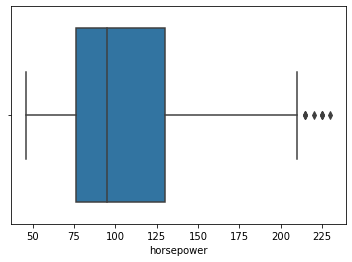

In [33]:
sns.boxplot(x=df1['horsepower'])
plt.show()

In [34]:
d5 = df1['weight'].value_counts()
d5

1985    4
2130    4
2720    3
2125    3
2300    3
       ..
3761    1
2223    1
2735    1
3245    1
2145    1
Name: weight, Length: 351, dtype: int64

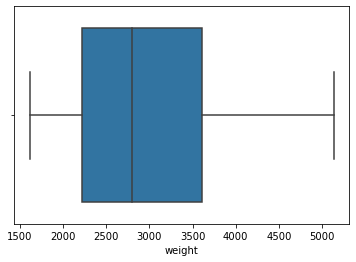

In [35]:
sns.boxplot(x=df1['weight'])
plt.show()

In [36]:
d6 = df1['acceleration'].value_counts()
d6

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
12.1     1
24.6     1
19.9     1
20.7     1
18.3     1
Name: acceleration, Length: 95, dtype: int64

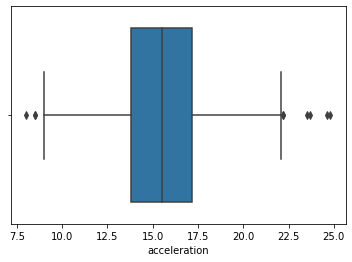

In [40]:
sns.boxplot(x=df1['acceleration'])
plt.show()

In [39]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'mil'],
      dtype='object')

In [41]:
df1['year'].value_counts()

1973    40
1978    36
1976    34
1982    31
1975    30
1970    29
1979    29
1980    29
1981    29
1971    28
1972    28
1977    28
1974    27
Name: year, dtype: int64

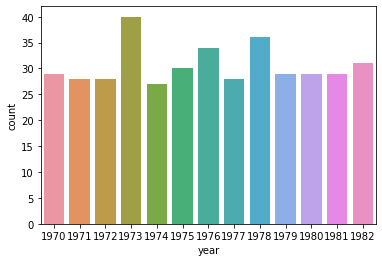

In [43]:
sns.countplot(x=df1['year'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


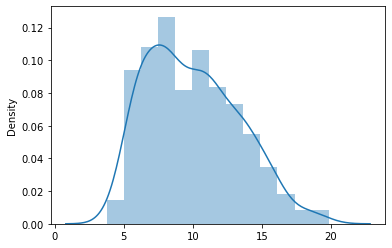

In [47]:
sns.distplot(x=df1['mil'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


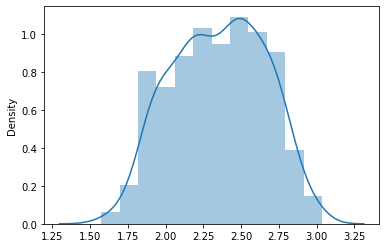

In [57]:
sns.distplot(x=np.log1p(df1['mil']))
plt.show()

In [ ]:
sns.distplot(np.sqrt(df1['mil']))
plt.show()

### Bi-variate Analysis

In [58]:
df1.shape

(398, 8)

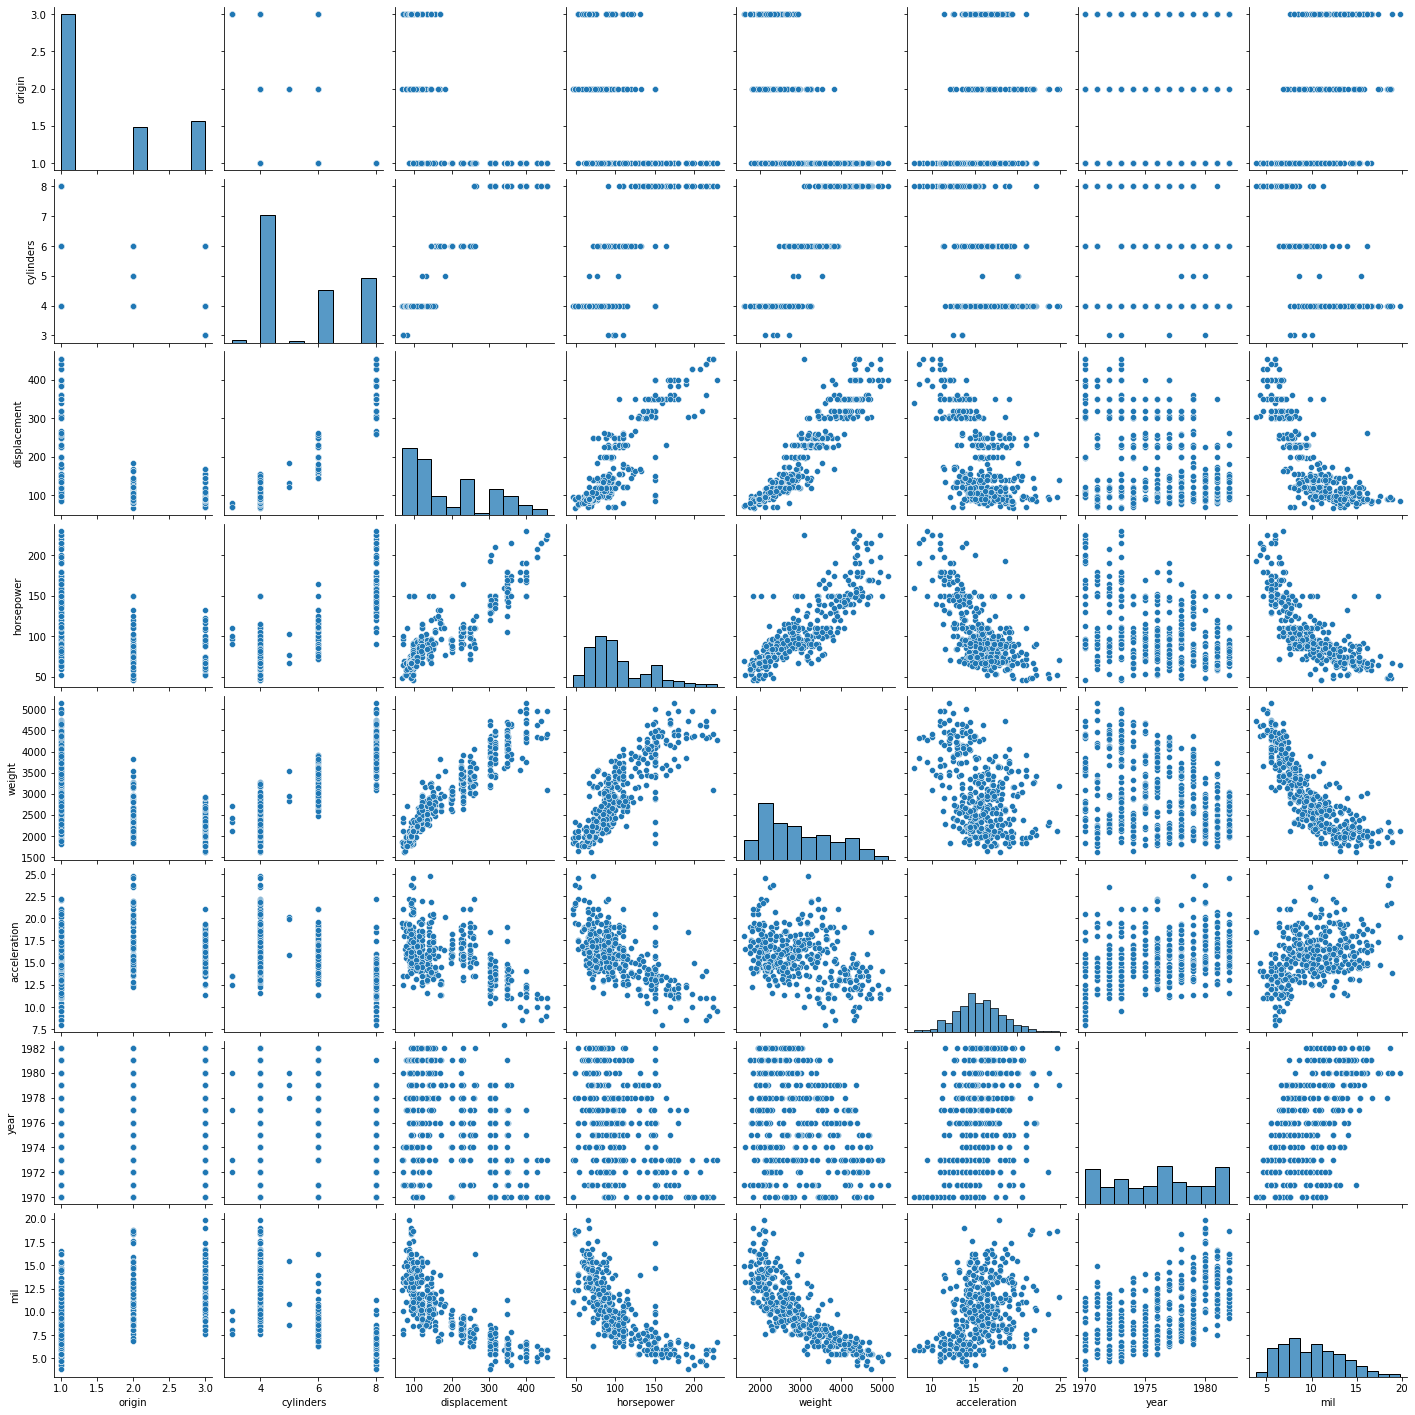

In [59]:
sns.pairplot(data=df1)
plt.show()

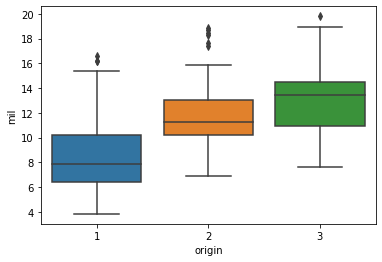

In [60]:
sns.boxplot(x=df1['origin'],y=df1['mil'])
plt.show()

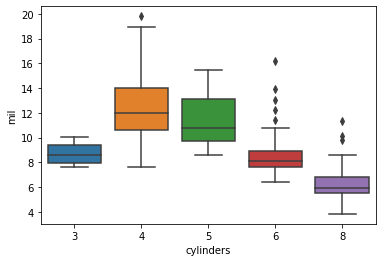

In [62]:
sns.boxplot(x=df1['cylinders'],y=df1['mil'])
plt.show()

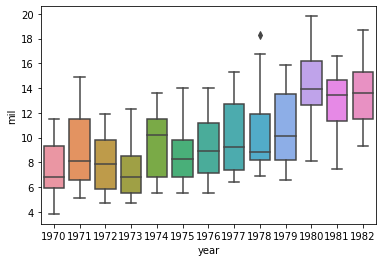

In [63]:
sns.boxplot(x=df1['year'],y=df1['mil'])
plt.show()

### Correlation

In [67]:
corr = df1.corr()
corr

,origin,cylinders,displacement,horsepower,weight,acceleration,year,mil
origin,1.000000,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.804203
horsepower,-0.454271,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.753177
weight,-0.581024,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.579267
mil,0.563450,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,1.000000


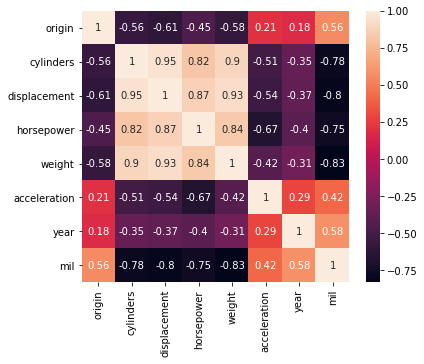

In [68]:
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True)
plt.show()

#### Inference
1) horsepower, cylinder, weight and displacement are highly correlated with each other

### Outlier Treatment /clipping

In [69]:
df1.describe(percentiles=[0.95,0.97,0.98,0.99])
# from univariate analysis -> outliers were detected in horsepower and acceleration

,origin,cylinders,displacement,horsepower,weight,acceleration,year,mil
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,105.155779,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
50%,1.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,1976.000000,9.778305
95%,3.000000,8.000000,400.000000,180.000000,4464.000000,20.415000,1982.000000,15.743071
97%,3.000000,8.000000,400.000000,198.000000,4654.270000,21.000000,1982.000000,16.232412
98%,3.000000,8.000000,429.000000,210.300000,4732.180000,21.806000,1982.000000,17.348414
99%,3.000000,8.000000,440.420000,220.150000,4951.030000,22.239000,1982.000000,18.458889
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [74]:
df1[df1['weight']>4654.270].shape
# (12,8)

(8, 9)

In [72]:
df1['weight'] = np.where(df1['weight']>4654.270,4654.270,df1['weight'])

#### Selecting x and y

In [81]:
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower        int32
weight          float64
acceleration    float64
year              int64
mil             float64
dtype: object

In [77]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
print(x.shape)
print(y.shape)

(398, 7)
(398,)


In [79]:
y.head(2)

0    7.652587
1    6.377156
Name: mil, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(298, 7)
(100, 7)
(298,)
(100,)


### LinearRegression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [85]:
m1 = LinearRegression()
m1.fit(x_tr,y_tr)

LinearRegression()

In [86]:
# R2_score
print('Training Score',m1.score(x_tr,y_tr))
print('Testing Score',m1.score(x_te,y_te))

Training Score 0.816465010734204
Testing Score 0.8471009259889852


In [90]:
ypred_m1= m1.predict(x_te)

In [92]:
def reg_metrics(y_te,ypred):
    mae = mean_absolute_error(y_te,ypred)
    mse = mean_squared_error(y_te,ypred)
    rmse = np.sqrt(mean_squared_error(y_te,ypred))
    r2s = r2_score(y_te,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_score',r2s)


In [94]:
print('LR_Model-1 metrics')
reg_metrics(y_te,ypred_m1)

LR_Model-1 metrics
MAE 0.9679959180263853
MSE 1.5692735196563155
RMSE 1.2527064778535775
R2_score 0.8471009259889852


In [96]:
x_tr.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'],
      dtype='object')

#### Model 2 (remove column - horsepower,dispalcement)

In [116]:
x_tr2 = x_tr[['origin', 'cylinders','weight','acceleration', 'year']]
x_te2 = x_te[['origin', 'cylinders','weight','acceleration', 'year']]
m2 = LinearRegression()
m2.fit(x_tr2,y_tr)

LinearRegression()

In [117]:
ypred_m2 = m2.predict(x_te2)

In [118]:
reg_metrics(y_te,ypred_m2)

MAE 0.9840581136476007
MSE 1.6376354788756626
RMSE 1.2797013240892043
R2_score 0.8404402131614941


### OLS

In [119]:
import statsmodels.api as sm

In [120]:
X = x_tr
Y = y_tr

X = sm.add_constant(X)
m3 = sm.OLS(Y,X).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mil   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     184.3
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          8.23e-103
Time:                        11:39:06   Log-Likelihood:                -531.08
No. Observations:                 298   AIC:                             1078.
Df Residuals:                     290   BIC:                             1108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -657.4100     51.918    -12.662      0.000    -759.595    -555.225
origin           0.5788      0.139      4.170      0.000       0.306       0.852
cylinders        0.0135      0.168      0.080      0.936      -0.317       0.344
displacement     0.0040      0.004      1.073      0.284      -0.003       0.011
horsepower      -0.0009      0.005     -0.167      0.868      -0.011       0.010
weight          -0.0030      0.000     -9.540      0.000      -0.004      -0.002
acceleration     0.0508      0.044      1.141      0.255      -0.037       0.138
year             0.3410      0.026     12.996      0.000       0.289       0.393
==============================================================================
Omnibus:                       23.955   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.294
Skew:                           0.543   Prob(JB):                     2.17e-08
Kurtosis:                       4.289   Cond. No.                     2.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
x_tr.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'],
      dtype='object')

In [130]:
X = x_tr[['origin', 'displacement', 'weight','acceleration', 'year']]
x_te_m4 = x_te[['origin','displacement','weight','acceleration', 'year']]
Y = y_tr

X = sm.add_constant(X)
m4 = sm.OLS(Y,X).fit()

m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mil   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     259.8
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          3.23e-105
Time:                        11:45:56   Log-Likelihood:                -531.10
No. Observations:                 298   AIC:                             1074.
Df Residuals:                     292   BIC:                             1096.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -658.8654     50.907    -12.943      0.000    -759.056    -558.675
origin           0.5768      0.136      4.245      0.000       0.309       0.844
displacement     0.0041      0.003      1.531      0.127      -0.001       0.009
weight          -0.0030      0.000    -10.434      0.000      -0.004      -0.002
acceleration     0.0547      0.038      1.449      0.148      -0.020       0.129
year             0.3417      0.026     13.259      0.000       0.291       0.392
==============================================================================
Omnibus:                       23.932   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.366
Skew:                           0.542   Prob(JB):                     2.09e-08
Kurtosis:                       4.294   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### SGD

In [131]:
from sklearn.linear_model import SGDRegressor

In [132]:
m5 = SGDRegressor(max_iter=400,eta0=0.001)
m5.fit(x_tr,y_tr)

SGDRegressor(eta0=0.001, max_iter=400)

In [133]:
ypred_m5 = m5.predict(x_te)

In [134]:
print('SGD Regression')
reg_metrics(y_te,ypred_m5)

SGD Regression
MAE 217672858980902.72
MSE 9.03451810541123e+28
RMSE 300574751191966.06
R2_score -8.802604741305114e+27
